# 1. Introduction

### Research Question
Use clustering (K-Means and Hierarchical) to group customers according to their behavior.

### Metric for Success


### Context
Kira Plastinina is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups.


### Experimental Design
1. Problem Definition
2. Data Sourcing
3. Check the Data
4. Perform Data Cleaning
5. Perform Exploratory Data Analysis  (Univariate, Bivariate & Multivariate)
6. Implement the Solution
7. Challenge the Solution
8. Follow up Questions


### Appropriateness of Data
The dataset can be found here: http://bit.ly/EcommerceCustomersDataset

Variable definitions are as follows:
- The dataset consists of 10 numerical and 8 categorical attributes. The **'Revenue'** attribute can be used as the class label.

- **"Administrative"**, **"Administrative Duration"**, **"Informational"**, **"Informational Duration"**, **"Product Related"** and **"Product Related Duration"** represents the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real-time when a user takes an action, e.g. moving from one page to another. 

- The **"Bounce Rate"**, **"Exit Rate"** and **"Page Value"** features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
    - The value of the **"Bounce Rate"** feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
    - The value of the **"Exit Rate"** feature for a specific web page is calculated as for all pageviews to the page, the percentage that was the last in the session.
    - The **"Page Value"** feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
    
- The **"Special Day"** feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentine’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

- The dataset also includes the operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

            1. Perform clustering stating insights drawn from your analysis and visualizations.
            2. Upon implementation, provide comparisons between the approaches learned this week i.e. K-Means clustering vs Hierarchical clustering highlighting the strengths and limitations of each approach in the context of your analysis

# 2. Data Cleaning & Preparation

In [2]:
# loading and previewing our dataset
df <- read.csv("online_shoppers_intention.csv")
head(df)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [3]:
# displaying the number of rows and columns
dim(df)

[1] 12330    18

We have 12,330 rows and 18 columns.

In [4]:
# previewing our dataset's basic information
str(df)

'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : Factor w/ 3 levels "Ne

In [5]:
# checking for duplicated records
anyDuplicated(df)

[1] 159

There are 159 duplicated records which we will need to remove to reduce redundancy.

In [6]:
# removing duplicates
df <- unique(df)
dim(df)

[1] 12211    18

In [7]:
# checking to see if there are missing values
colSums(is.na(df))

Administrative Administrative_Duration           Informational 
                     12                      12                      12 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     12                      12                      12 
            BounceRates               ExitRates              PageValues 
                     12                      12                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

Before we can do anything about the missing values, we have to first confirm that we have more than sufficient records. A rule of thumb is to ensure that there are at least 5 records per variables (at least 5 rows for each column). We have 18 columns, so 18 times 5 is 900. Since we have way more than 900 records, it is safe and efficient to just drop these records with missing values.

In [8]:
df <- na.omit(df)
colSums(is.na(df))

Administrative Administrative_Duration           Informational 
                      0                       0                       0 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                      0                       0                       0 
            BounceRates               ExitRates              PageValues 
                      0                       0                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

In [9]:
# ensuring we haven't lost too many records
dim(df)

[1] 12199    18

The **OperatingSystems**, **Browser**, **Region**, and **TrafficType** variables are clearly categorical in nature and not numerical, it's just that they have already been encoded to make them easier to work with. The same goes for the **Weekend** and **Revenue** columns. We will convert all of them to their appropriate data type.

In [10]:
df$OperatingSystems <- as.factor(df$OperatingSystems)
df$Browser <- as.factor(df$Browser)
df$Region <- as.factor(df$Region)
df$TrafficType <- as.factor(df$TrafficType)
df$Weekend <- as.factor(df$Weekend)
df$Revenue <- as.factor(df$Revenue)

# confirming the data types have been changed
str(df)

'data.frame':	12199 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : Factor w/ 8 levels "1","2","3","4",..: 1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : Factor w/ 13 levels "1","2","3","4",..: 1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : Factor w/ 9 levels "1","2","3","4",..: 1 1 9 2 1 1 3 1 2 1 ...
 $ T

# 3. Exploratory Data Analysis

In [11]:
# getting the main summary
summary(df)

 Administrative  Administrative_Duration Informational    
 Min.   : 0.00   Min.   :  -1.00         Min.   : 0.0000  
 1st Qu.: 0.00   1st Qu.:   0.00         1st Qu.: 0.0000  
 Median : 1.00   Median :   9.00         Median : 0.0000  
 Mean   : 2.34   Mean   :  81.68         Mean   : 0.5088  
 3rd Qu.: 4.00   3rd Qu.:  94.75         3rd Qu.: 0.0000  
 Max.   :27.00   Max.   :3398.75         Max.   :24.0000  
                                                          
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  8.00   1st Qu.:  193.6        
 Median :   0.00        Median : 18.00   Median :  609.5        
 Mean   :  34.84        Mean   : 32.06   Mean   : 1207.5        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1477.6        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
                                                                
  Bounce

In [12]:
library(psych)
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
Administrative,1,12199,2.340028e+00,3.330851e+00,1.000000e+00,1.656593e+00,1.482600e+00,0,27.0000,27.0000,1.9460087,4.6348537,3.015735e-02
Administrative_Duration,2,12199,8.168214e+01,1.775282e+02,9.000000e+00,4.286683e+01,1.334340e+01,-1,3398.7500,3399.7500,5.5895226,50.0851812,1.607330e+00
Informational,3,12199,5.088122e-01,1.275817e+00,0.000000e+00,1.824608e-01,0.000000e+00,0,24.0000,24.0000,4.0129580,26.6376802,1.155118e-02
Informational_Duration,4,12199,3.483734e+01,1.414585e+02,0.000000e+00,3.726866e+00,0.000000e+00,-1,2549.3750,2550.3750,7.5365079,75.4512246,1.280758e+00
ProductRelated,5,12199,3.205845e+01,4.460091e+01,1.800000e+01,2.305573e+01,1.927380e+01,0,705.0000,705.0000,4.3316012,31.0434452,4.038142e-01
ProductRelated_Duration,6,12199,1.207508e+03,1.919927e+03,6.095417e+02,8.323577e+02,7.451177e+02,-1,63973.5222,63974.5222,7.2505117,136.5679069,1.738292e+01
BounceRates,7,12199,2.044674e-02,4.540250e-02,2.930403e-03,8.135649e-03,4.344615e-03,0,0.2000,0.2000,3.1524863,9.2530550,4.110718e-04
ExitRates,8,12199,4.149678e-02,4.624716e-02,2.500000e-02,3.131007e-02,2.059167e-02,0,0.2000,0.2000,2.2328507,4.6230025,4.187193e-04
PageValues,9,12199,5.952500e+00,1.865779e+01,0.000000e+00,1.331972e+00,0.000000e+00,0,361.7637,361.7637,6.3478824,64.9291691,1.689266e-01
SpecialDay,10,12199,6.197229e-02,1.997106e-01,0.000000e+00,6.146911e-04,0.000000e+00,0,1.0000,1.0000,3.2840768,9.7839577,1.808169e-03


From what we've gotten:
* On Visitor Type:
    - 10425 are Returning
    - 1693 are New
    - 81 are Other
* On Weekend:
    - 9343 are False
    - 2856 are True

* On Revenue:
    - 10291 are False
    - 1908 are True
    

Even without going through the whole dataset, we can see that it is very biased as far as the VisitorType, Weekend, and Revenue columns are concerned. We will have to balance these classes before modeling.

## 3.1 Univariate Analysis

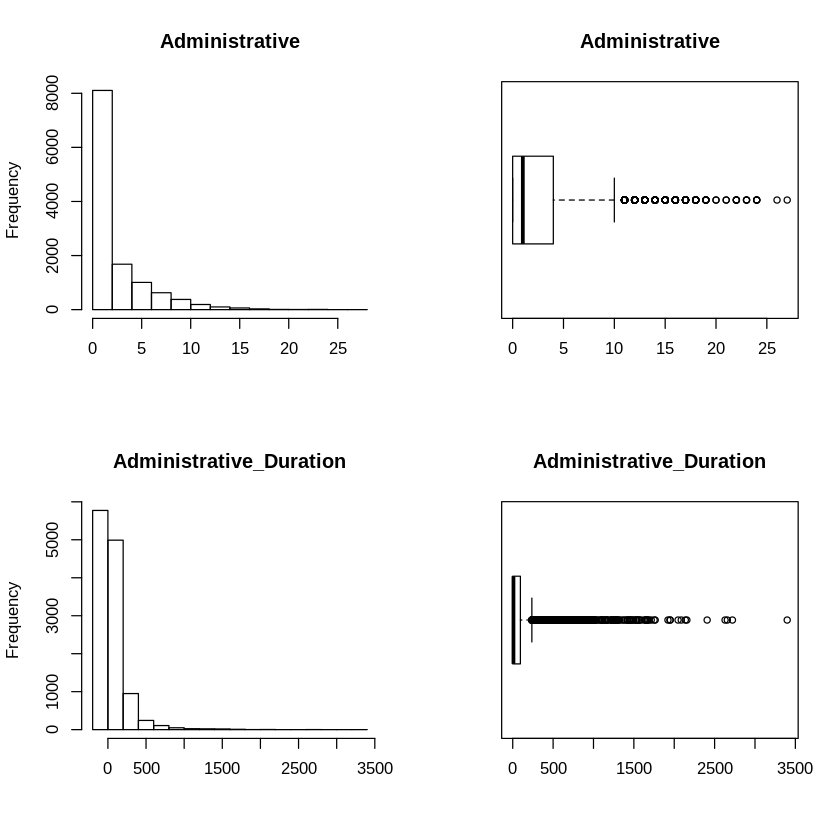

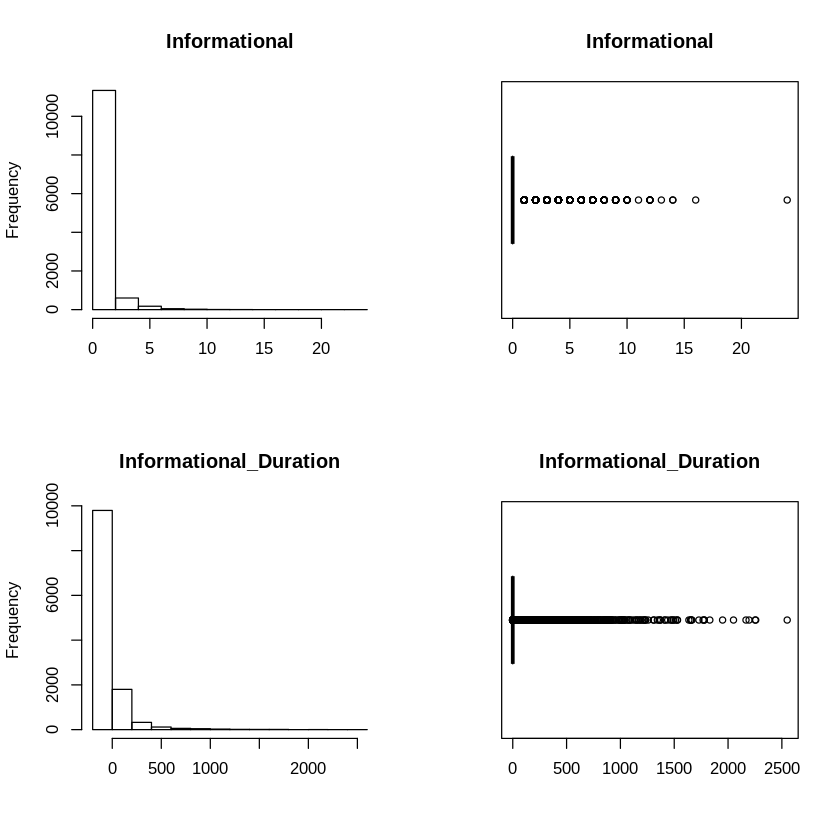

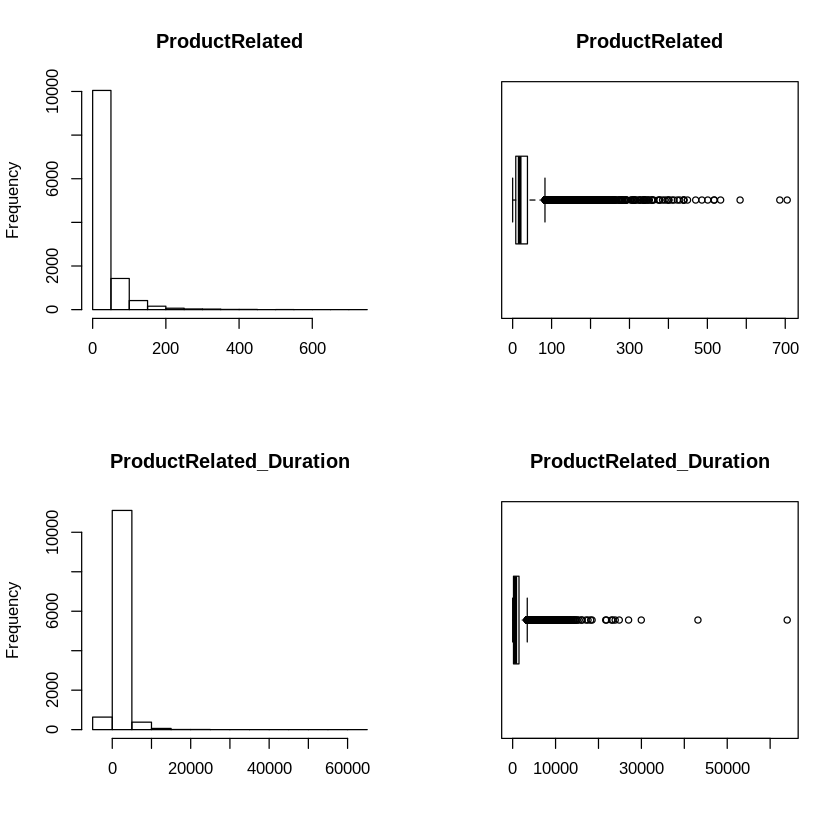

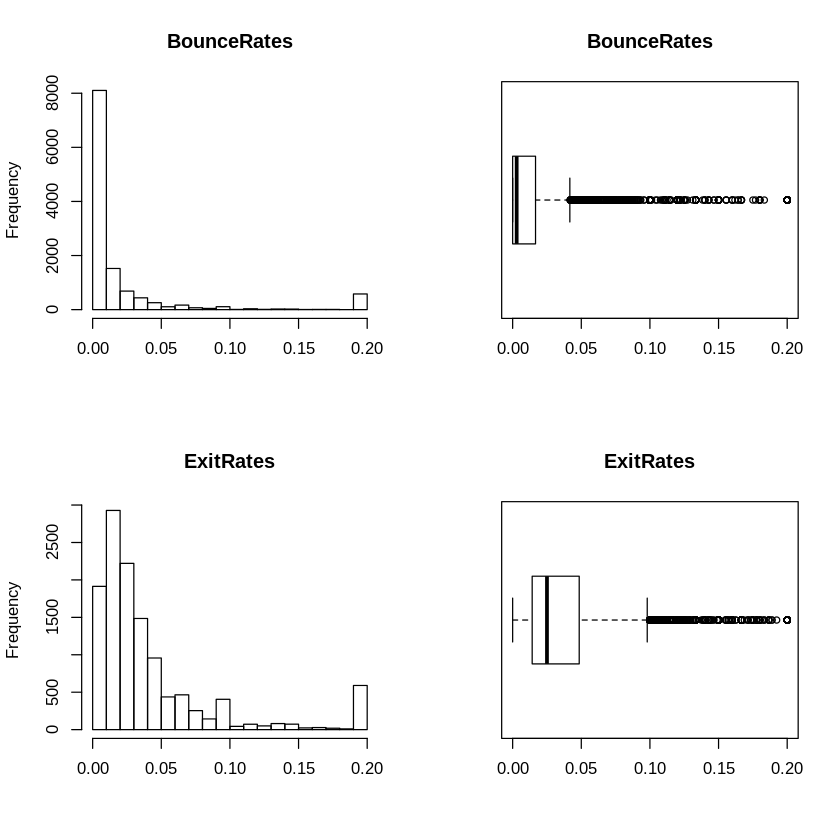

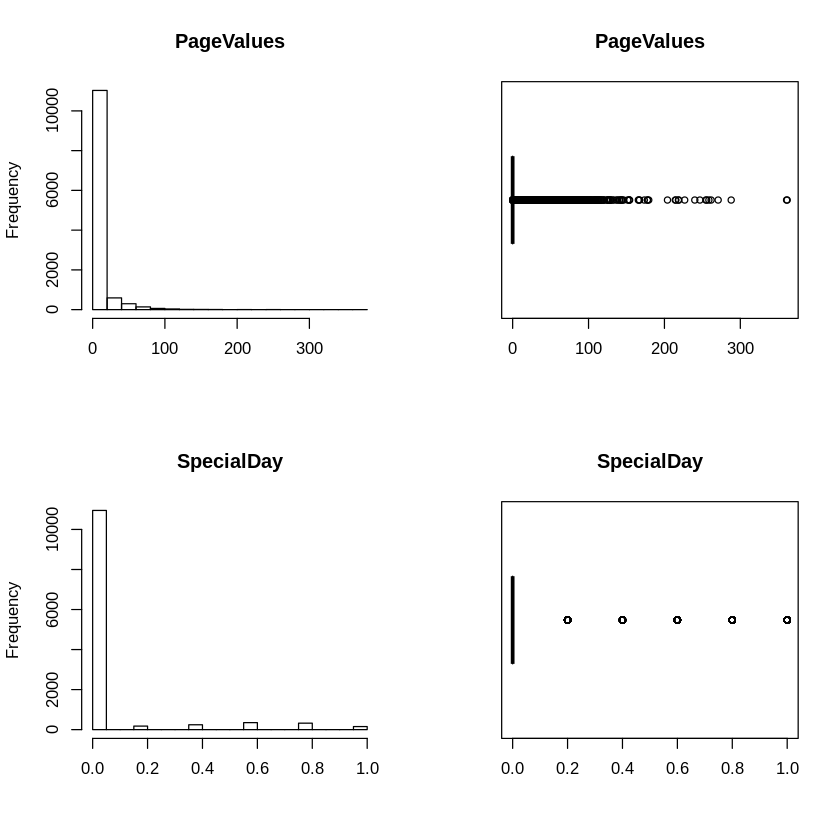

In [13]:
# previewing the numerical variables' histograms and boxplots
par(mfrow=c(2,2))
for(i in 1:10) {
    hist(df[, i], main=names(df)[i], xlab = NULL)
    boxplot(df[,i], main=names(df)[i], horizontal = TRUE)}

All our numerical variables have outliers and are positively skewed. The outliers will not be removed because they represent the real world, and can provide some insights as to why they occurred.

In [14]:
# create tables of all categorical variables to be able to create bar plots with them
month_table <- table(df$Month)
os_table <- table(df$OperatingSystems)
browser_table <- table(df$Browser)
region_table <- table(df$Region)
traffic_table <- table(df$TrafficType)
visitor_table <- table(df$VisitorType)
weekend_table <- table(df$Weekend)
revenue_table <- table(df$Revenue)

In [15]:
# function for adjusting plot size
set_plot_dimensions <- function(width_choice, height_choice) {
    options(repr.plot.width = width_choice, repr.plot.height = height_choice)
}


 Aug  Dec  Feb  Jul June  Mar  May  Nov  Oct  Sep 
 433 1706  182  432  285 1853 3328 2983  549  448 

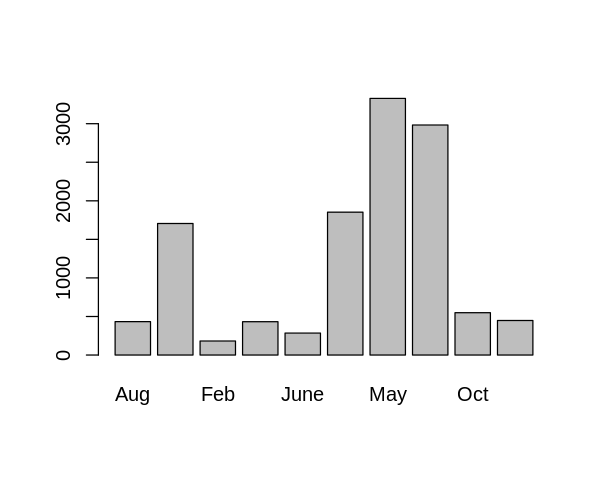

In [16]:
# barplot of Month
set_plot_dimensions(5, 4)
month_table
barplot(month_table)

May is the most frequently occuring month with February being the least frequently occuring.


   1    2    3    4    5    6    7    8 
2548 6536 2530  478    6   19    7   75 

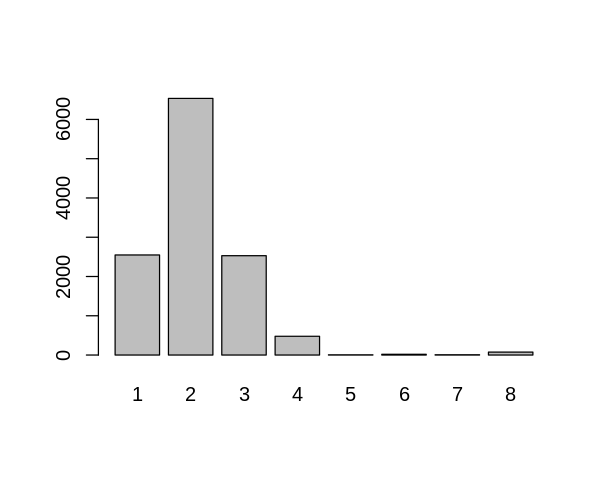

In [17]:
# barplot of Operating System
set_plot_dimensions(5, 4)
os_table
barplot(os_table)

Operating System 2 is the most widely used Operating System (my money is on Windows), followed by OS 1 and 2 which seem to be almost the same. OS 5 is the least used operating system.


   1    2    3    4    5    6    7    8    9   10   11   12   13 
2426 7878  105  730  466  174   49  135    1  163    6   10   56 

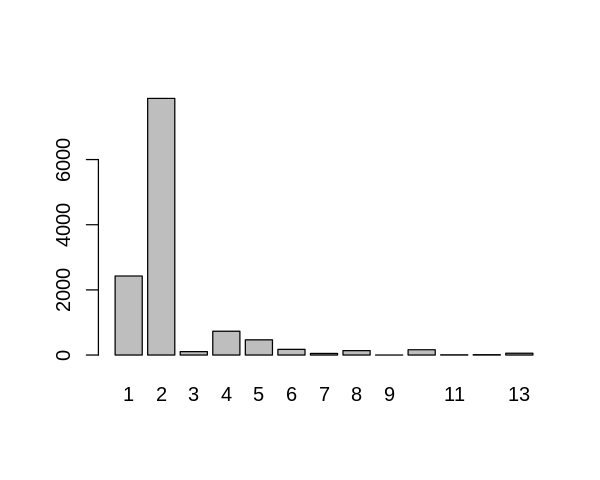

In [18]:
# barplot of Browser
set_plot_dimensions(5, 4)
browser_table
barplot(browser_table)

Browser 2 is the most widely used browser and it's followed by Browser 1. Browsers 9, 11, and 12 appear to be the least used browsers.


   1    2    3    4    5    6    7    8    9 
4711 1127 2382 1168  317  800  758  431  505 

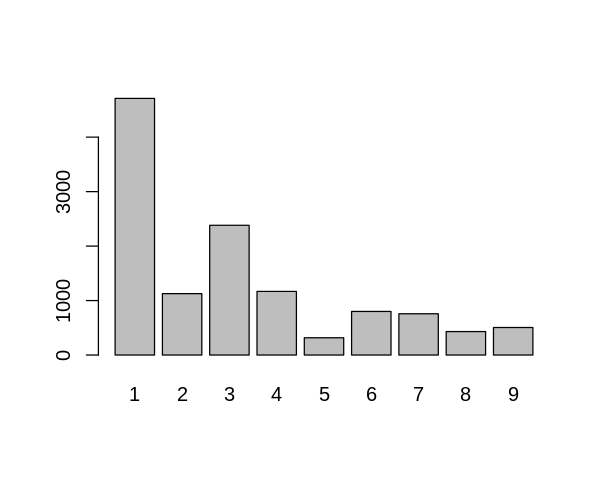

In [19]:
# barplot of Region
set_plot_dimensions(5, 4)
region_table
barplot(region_table)

Region 1 is the most occuring region while Region 5 is the least occuring.


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2383 3907 2017 1066  260  443   40  343   41  450  247    1  728   13   36    3 
  17   18   19   20 
   1   10   17  193 

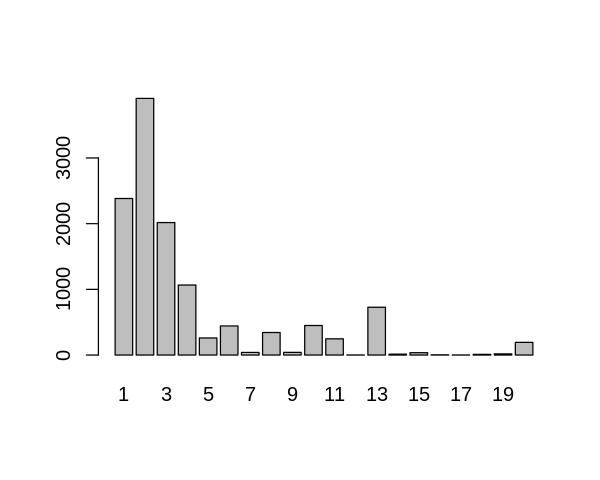

In [20]:
# barplot of TrafficType
set_plot_dimensions(5, 4)
traffic_table
barplot(traffic_table)

Traffic TType 2 is the highest followed by Type 1 and Type 3. Type 12, 16, and 17 appear to be the least frequently occuring in the dataset.


      New_Visitor             Other Returning_Visitor 
             1693                81             10425 

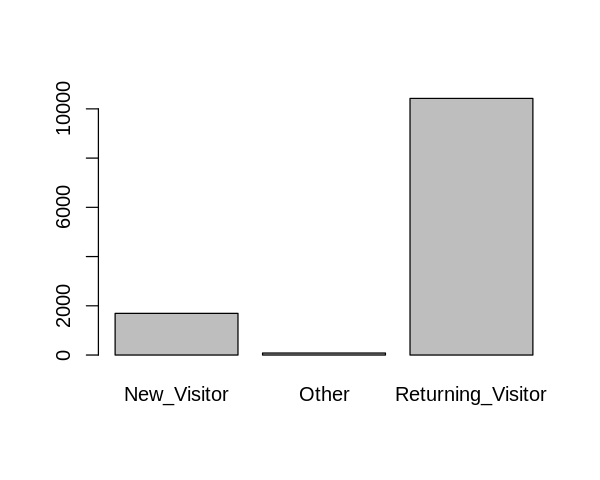

In [21]:
# barplot of VisitorType
set_plot_dimensions(5, 4)
visitor_table
barplot(visitor_table)

Majority of the visitors are returning, i.e., they are not new to this business.


FALSE  TRUE 
 9343  2856 

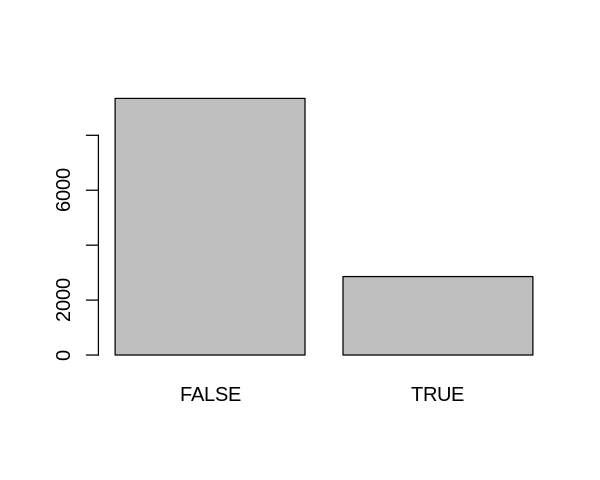

In [22]:
# barplot of Weekend
set_plot_dimensions(5, 4)
weekend_table
barplot(weekend_table)

Weekdays outnumber weekends in this dataset.


FALSE  TRUE 
10291  1908 

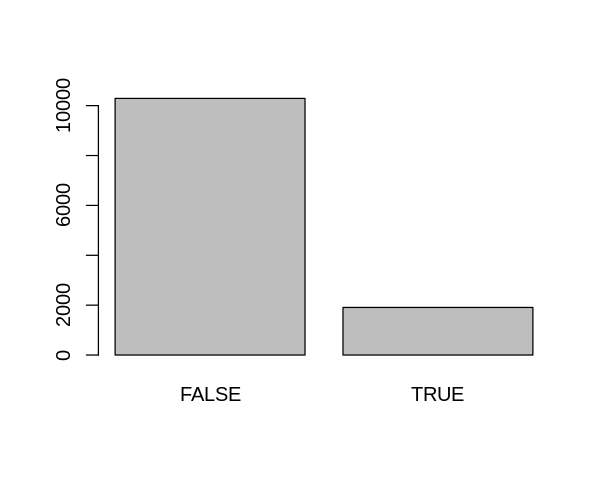

In [23]:
# barplot of Revenue
set_plot_dimensions(5, 4)
revenue_table
barplot(revenue_table)

There are more FALSE revenues than true ones by a hugely disproporionate margin.

## 3.2 Bivariate Analysis

In [24]:
library(ggplot2)


Attaching package: ‘ggplot2’

The following objects are masked from ‘package:psych’:

    %+%, alpha



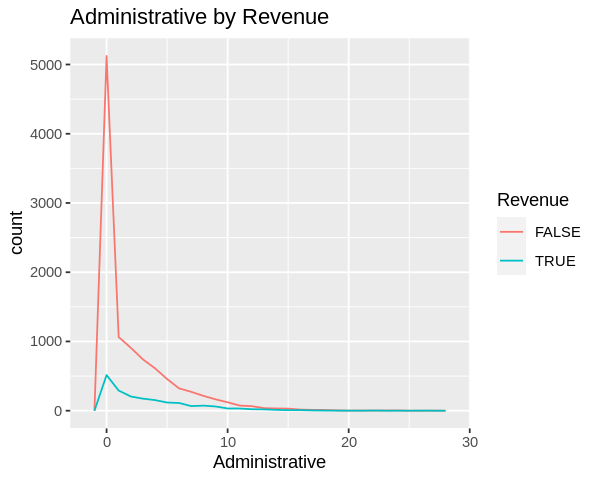

In [25]:
# Administrative by Revenue
set_plot_dimensions(5, 4)
ggplot(df, aes(x = Administrative, fill = Revenue, color = Revenue)) +
geom_freqpoly(binwidth = 1) +
labs(title = "Administrative by Revenue")

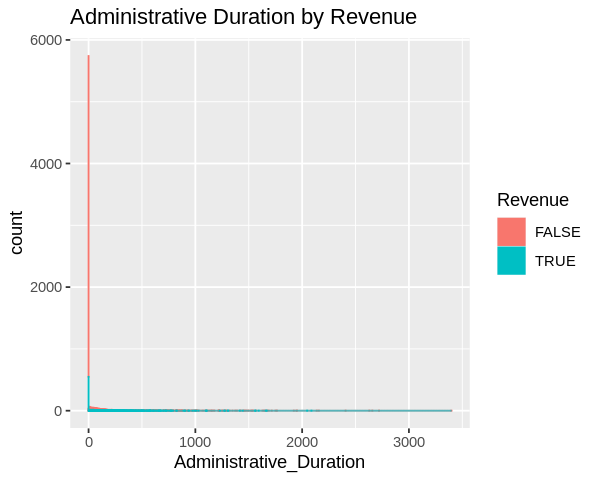

In [26]:
# Administrative Duration by Revenue
set_plot_dimensions(5, 4)
ggplot(df, aes(x = Administrative_Duration, fill = Revenue, color = Revenue)) +
geom_histogram(binwidth = 1) +
labs(title = "Administrative Duration by Revenue")

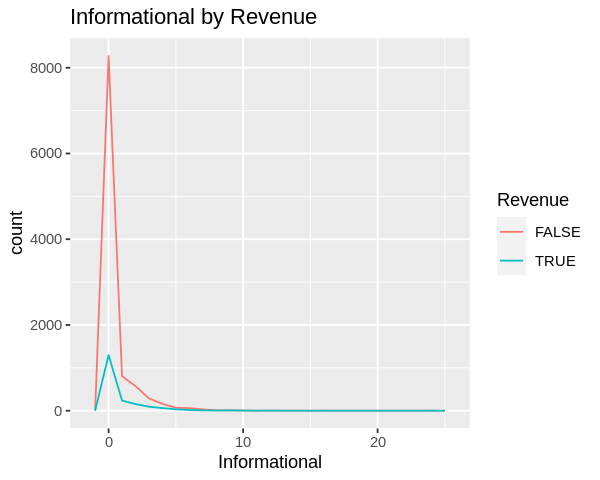

In [27]:
# Informational by Revenue
set_plot_dimensions(5, 4)
ggplot(df, aes(x = Informational, fill = Revenue, color = Revenue)) +
geom_freqpoly(binwidth = 1) +
labs(title = "Informational by Revenue")

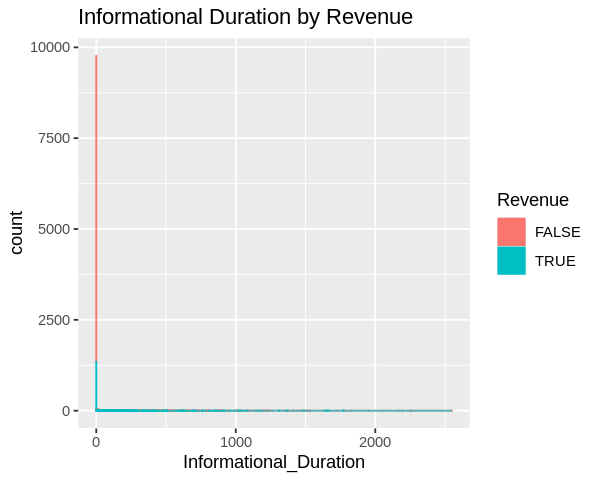

In [28]:
# Informational Duration by Revenue
set_plot_dimensions(5, 4)
ggplot(df, aes(x = Informational_Duration, fill = Revenue, color = Revenue)) +
geom_histogram(binwidth = 1) +
labs(title = "Informational Duration by Revenue")

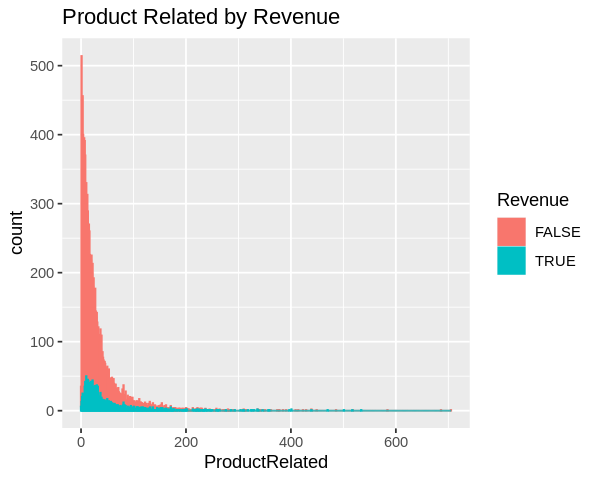

In [29]:
# product related by Revenue
set_plot_dimensions(5, 4)
ggplot(df, aes(x = ProductRelated, fill = Revenue, color = Revenue)) +
geom_histogram(binwidth = 1) +
labs(title = "Product Related by Revenue")

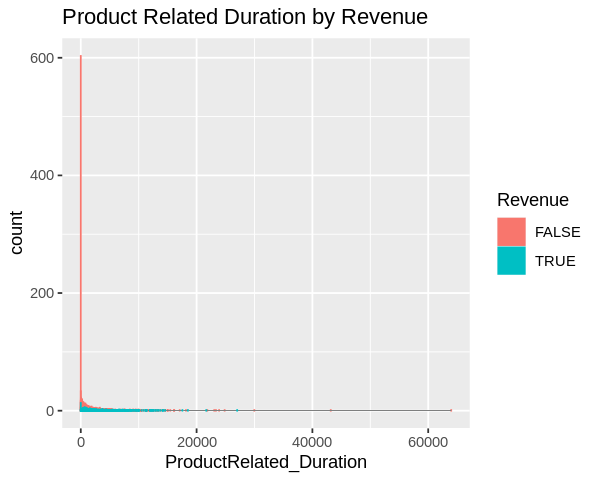

In [30]:
# product related duration by Revenue
set_plot_dimensions(5, 4)
ggplot(df, aes(x = ProductRelated_Duration, fill = Revenue, color = Revenue)) +
geom_histogram(binwidth = 1) +
labs(title = "Product Related Duration by Revenue")

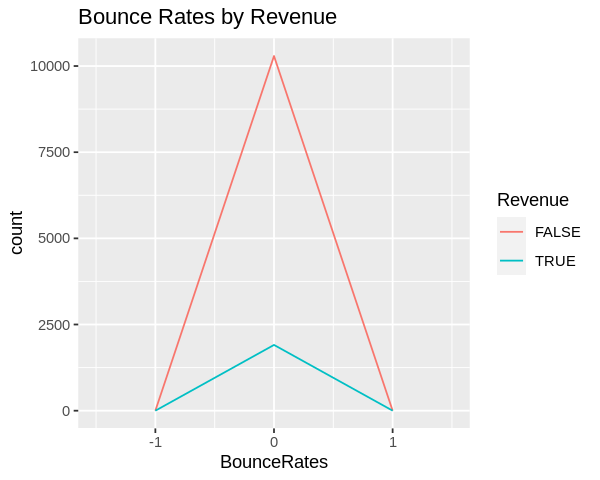

In [31]:
# bounce rates by Revenue
set_plot_dimensions(5, 4)
ggplot(df, aes(x = BounceRates, fill = Revenue, color = Revenue)) +
geom_freqpoly(binwidth = 1) +
labs(title = "Bounce Rates by Revenue")

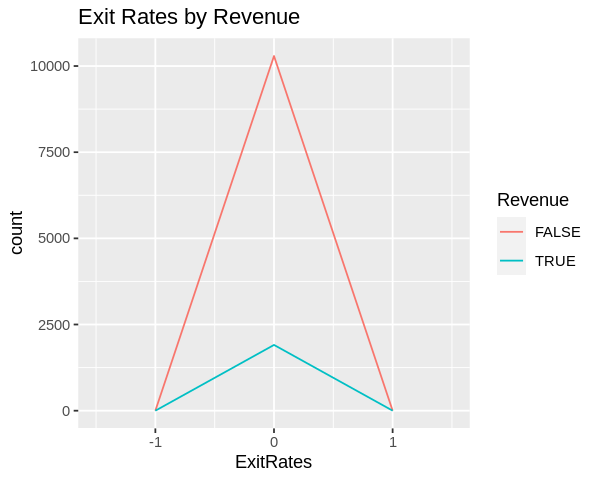

In [32]:
# exit rates by Revenue
set_plot_dimensions(5, 4)
ggplot(df, aes(x = ExitRates, fill = Revenue, color = Revenue)) +
geom_freqpoly(binwidth = 1) +
labs(title = "Exit Rates by Revenue")

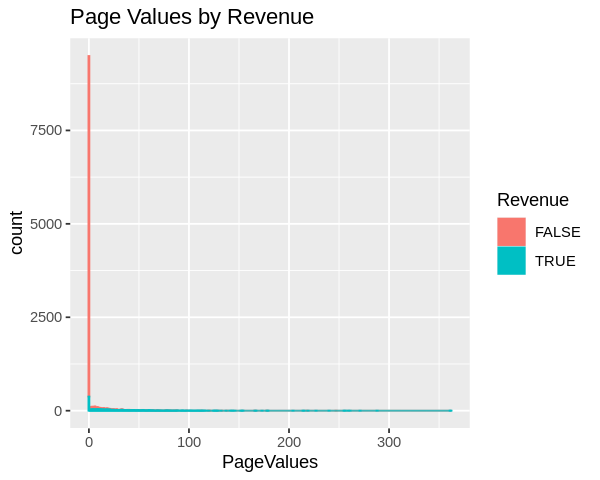

In [33]:
# Page Values by Revenue
set_plot_dimensions(5, 4)
ggplot(df, aes(x = PageValues, fill = Revenue, color = Revenue)) +
geom_histogram(binwidth = 1) +
labs(title = "Page Values by Revenue")

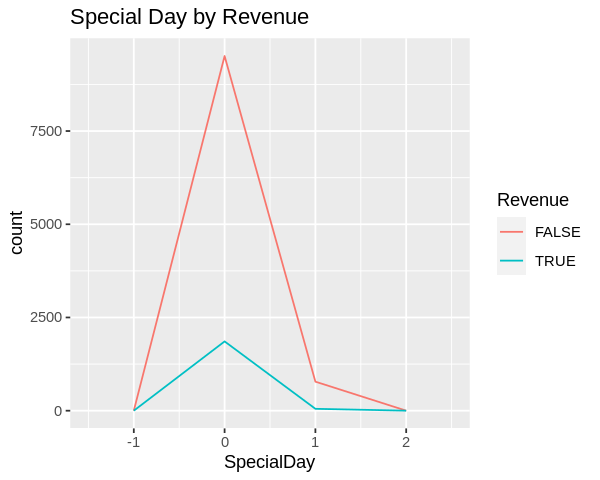

In [34]:
# special day by Revenue
set_plot_dimensions(5, 4)
ggplot(df, aes(x = SpecialDay, fill = Revenue, color = Revenue)) +
geom_freqpoly(binwidth = 1) +
labs(title = "Special Day by Revenue")

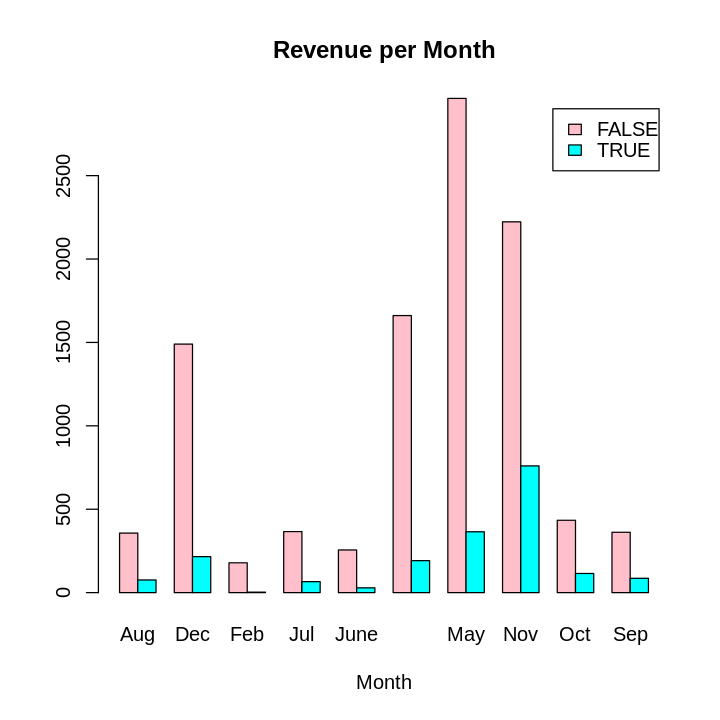

In [35]:
# plotting the distribution of Revenue per Month
set_plot_dimensions(6, 6)
rev_month <- table(df$Revenue, df$Month)
barplot(rev_month, main = "Revenue per Month", col = c("pink", "cyan"), beside = TRUE, 
        legend = rownames(rev_month), xlab = "Month")

November returns the highest number of revenues while February returns the lowest.

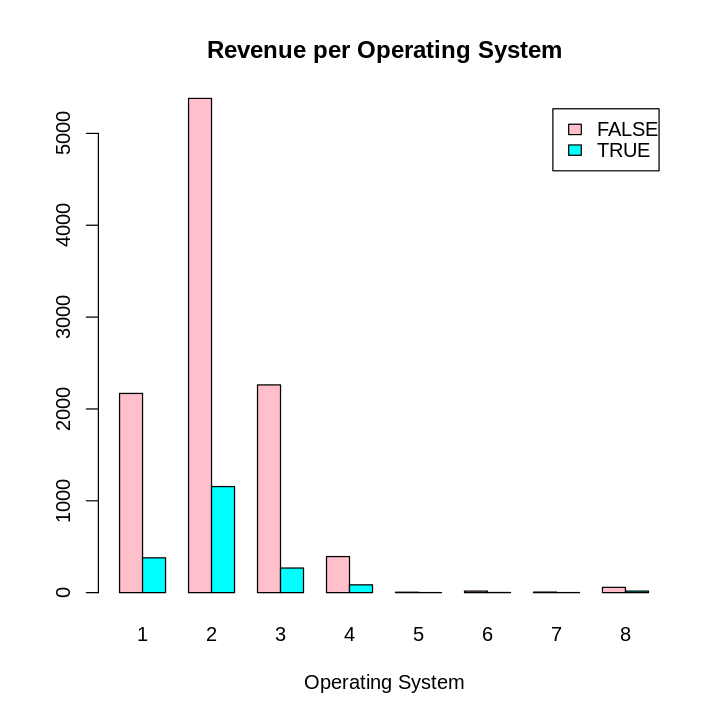

In [36]:
# plotting the distribution of Revenue per Operating System
set_plot_dimensions(6, 6)
rev_os <- table(df$Revenue, df$OperatingSystems)
barplot(rev_os, main = "Revenue per Operating System", col = c("pink", "cyan"), beside = TRUE, 
        legend = rownames(rev_os), xlab = "Operating System")

Operating System 2 returns the highest number of revenue while OS 5, 6, and 7 return the lowest.

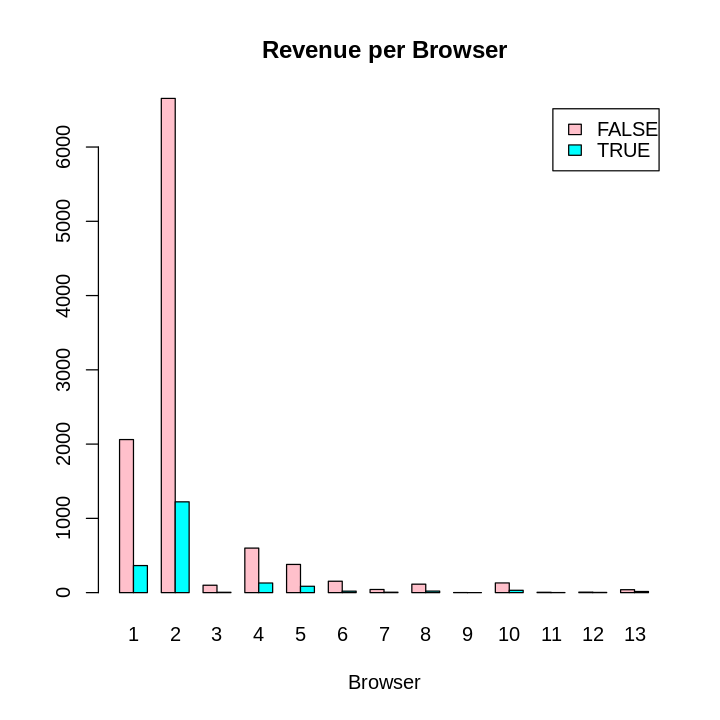

In [37]:
# plotting the distribution of Revenue per Browser
set_plot_dimensions(6, 6)
rev_browser <- table(df$Revenue, df$Browser)
barplot(rev_browser, main = "Revenue per Browser", col = c("pink", "cyan"), beside = TRUE, 
        legend = rownames(rev_browser), xlab = "Browser")

Browser 2 returns the highest number of revenue while 3, 7, 9, 11, and 12 return the lowest.

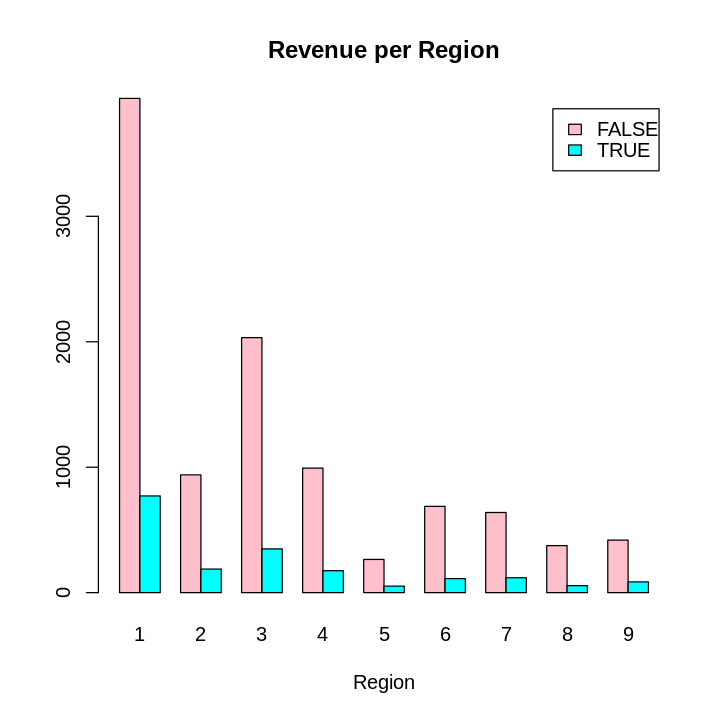

In [38]:
# plotting the distribution of Revenue per Region
set_plot_dimensions(6, 6)
rev_region <- table(df$Revenue, df$Region)
barplot(rev_region, main = "Revenue per Region", col = c("pink", "cyan"), beside = TRUE, 
        legend = rownames(rev_region), xlab = "Region")

Region 1 returns the highest number of revenue, Region 5 returns the lowest.

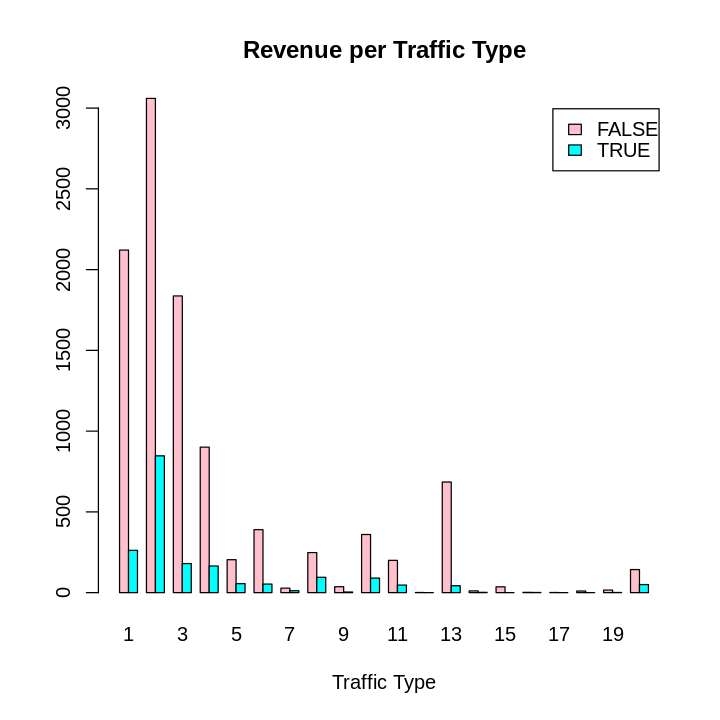

In [39]:
# plotting the distribution of Revenue per Traffic Type
set_plot_dimensions(6, 6)
rev_traffic <- table(df$Revenue, df$TrafficType)
barplot(rev_traffic, main = "Revenue per Traffic Type", col = c("pink", "cyan"), beside = TRUE, 
        legend = rownames(rev_traffic), xlab = "Traffic Type")

Traffic 2 has the highest number of revenues, 12, 14, 16, 17, and 18 return the lowest.

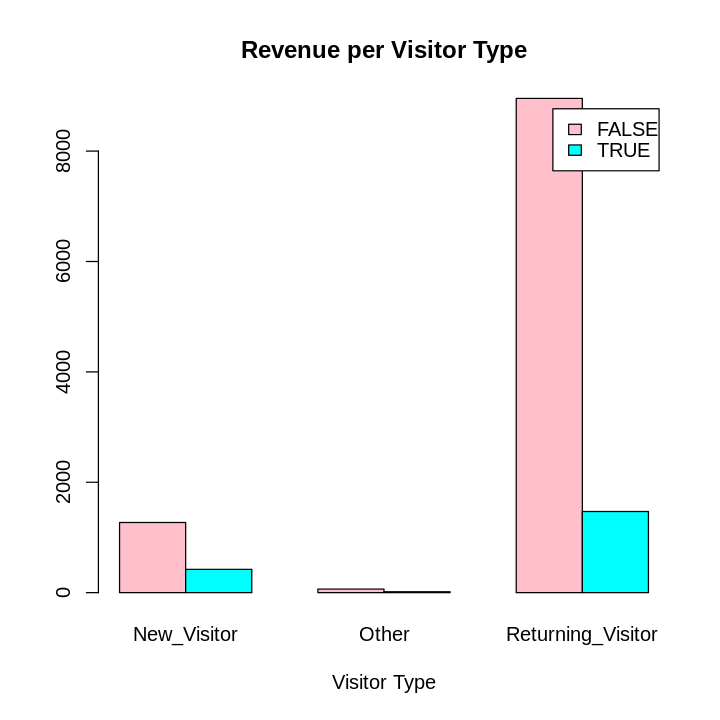

In [40]:
# plotting the distribution of Revenue per Visitor Type
set_plot_dimensions(6, 6)
rev_visitor <- table(df$Revenue, df$VisitorType)
barplot(rev_visitor, main = "Revenue per Visitor Type", col = c("pink", "cyan"), beside = TRUE, 
        legend = rownames(rev_visitor), xlab = "Visitor Type")

As expected, returning visitors generated more revenue.

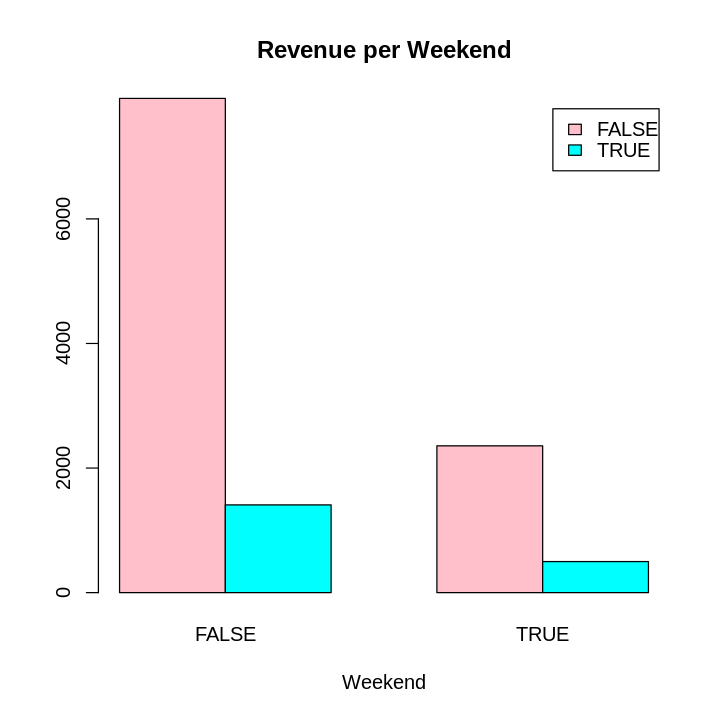

In [41]:
# plotting the distribution of Revenue per Weekend
set_plot_dimensions(6, 6)
rev_weekend <- table(df$Revenue, df$Weekend)
barplot(rev_weekend, main = "Revenue per Weekend", col = c("pink", "cyan"), beside = TRUE, 
        legend = rownames(rev_weekend), xlab = "Weekend")

As expected, more revenue was generated during the weekdays than the weekends. This is to be expected since there are way more records of weekdays than of weekends.

Now to find the correlations between the numerical variables.

In [42]:
# get numerical columns
df_num <- df[,1:10]
head(df_num)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0


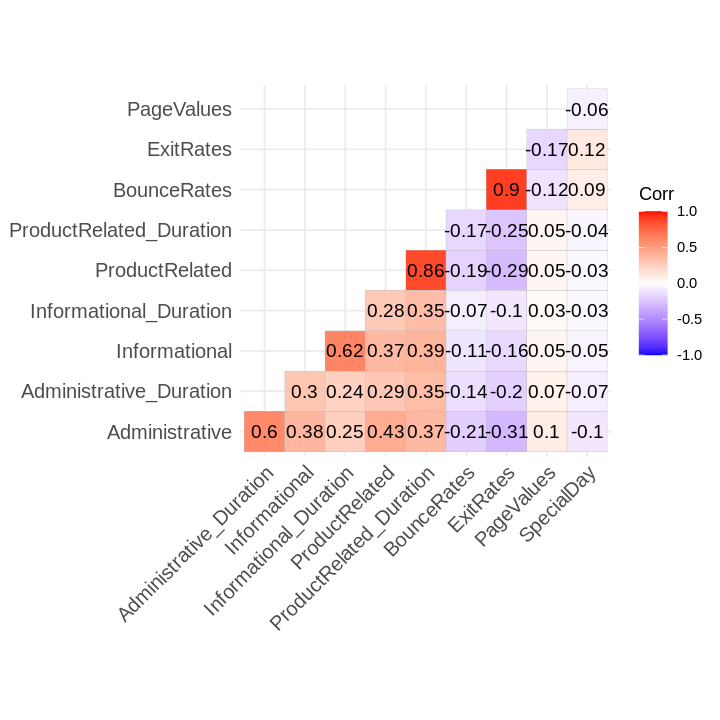

In [43]:
# using a heat map to visualize variable correlations
library(ggcorrplot)
set_plot_dimensions(6, 6)
corr_df <- cor(df_num)
ggcorrplot(round(corr_df, 2) ,lab = T,type = 'lower')

As I suspected, BounceRates is very highly correlated to ExitRates, Administrative is correlated with Administrative_Duration, Informational is highly correlated to Informational_Duration, and ProductRelated is highly correlated with ProductRated_Duration. Therefore, we will have to drop one variable of each of the highly correlated pairs to reduce dimensionality and redundancy.

In [44]:
# dropping the highly correlated columns
to_drop <- c("Administrative_Duration", "Informational_Duration", "ProductRelated_Duration", "ExitRates")

df <- df[, !names(df) %in% to_drop]
head(df)

Administrative,Informational,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,1,0.20000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,2,0.00000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,0,1,0.20000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,2,0.05000000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,10,0.02000000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,19,0.01578947,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [45]:
# getting the numerical columns from the new and revised dataframe
df_num <- df[,1:6]
head(df_num)

Administrative,Informational,ProductRelated,BounceRates,PageValues,SpecialDay
0,0,1,0.20000000,0,0
0,0,2,0.00000000,0,0
0,0,1,0.20000000,0,0
0,0,2,0.05000000,0,0
0,0,10,0.02000000,0,0
0,0,19,0.01578947,0,0


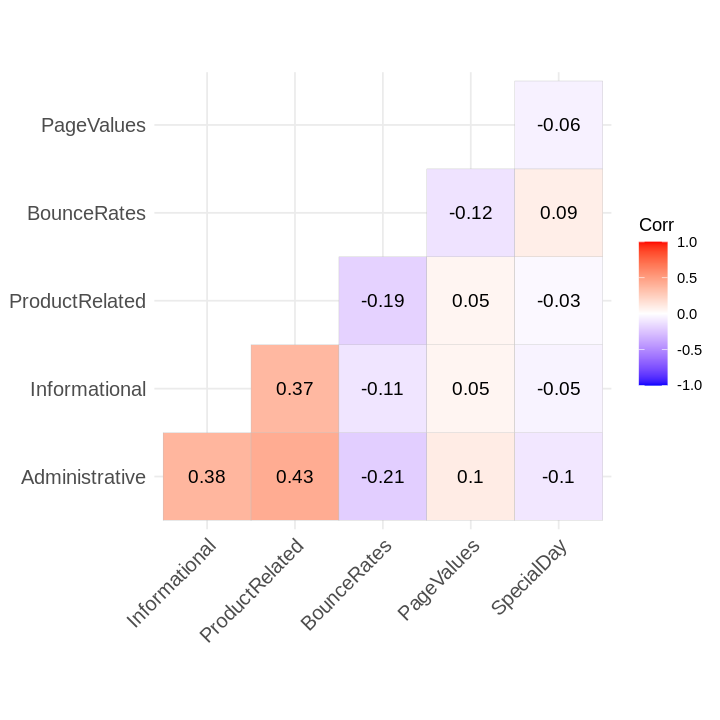

In [46]:
# visualizing the correlations of the new dataset
set_plot_dimensions(6, 6)
new_corr_df <- cor(df_num)
ggcorrplot(round(new_corr_df, 2) ,lab = T,type = 'lower')

As we can see, removing the highly correlaed variables reduced multicollinearity in our dataset. It also made it easier to work with. We can now move on to modelling.

In [47]:
# save to csv 
write.csv(df, "customer_new.csv")

# 4. Modeling

# 4.1 Supervised Learning

### 4.1.1 Feature Engineering

In [48]:
library(lattice)
library(caret)

In [49]:
# shuffling our data set to randomize the records
shuffle_index <- sample(1:nrow(df))
df <- df[shuffle_index, ]
dim(df)
head(df)

[1] 12199    14

,Administrative,Informational,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
9742,0,0,41,0.000000000,19.510101,0.0,Dec,2,5,3,1,Returning_Visitor,FALSE,TRUE
10738,0,0,18,0.005882353,0.000000,0.0,Dec,3,3,3,2,Returning_Visitor,FALSE,FALSE
4280,2,5,21,0.011904762,20.379650,0.0,May,1,1,1,2,Returning_Visitor,FALSE,FALSE
6045,0,0,30,0.000000000,0.000000,0.0,Jul,1,1,1,4,Returning_Visitor,FALSE,FALSE
5512,6,0,40,0.000000000,8.480846,0.0,Aug,1,1,1,4,New_Visitor,TRUE,FALSE
5081,2,0,45,0.033469388,13.184082,0.8,May,2,10,3,2,Returning_Visitor,FALSE,FALSE


In [50]:
# Normalizing the dataset 
normalize <- function(x){
  return ((x-min(x)) / (max(x)-min(x)))
}

df$Administrative <- normalize(df$Administrative)
df$Informational <- normalize(df$Informational)
df$ProductRelated <- normalize(df$ProductRelated)
df$BounceRates <- normalize(df$BounceRates)
df$PageValues <- normalize(df$PageValues)
df$SpecialDay <- normalize(df$SpecialDay)
head(df)

,Administrative,Informational,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
9742,0.00000000,0.0000000,0.05815603,0.00000000,0.05393050,0.0,Dec,2,5,3,1,Returning_Visitor,FALSE,TRUE
10738,0.00000000,0.0000000,0.02553191,0.02941176,0.00000000,0.0,Dec,3,3,3,2,Returning_Visitor,FALSE,FALSE
4280,0.07407407,0.2083333,0.02978723,0.05952381,0.05633414,0.0,May,1,1,1,2,Returning_Visitor,FALSE,FALSE
6045,0.00000000,0.0000000,0.04255319,0.00000000,0.00000000,0.0,Jul,1,1,1,4,Returning_Visitor,FALSE,FALSE
5512,0.22222222,0.0000000,0.05673759,0.00000000,0.02344305,0.0,Aug,1,1,1,4,New_Visitor,TRUE,FALSE
5081,0.07407407,0.0000000,0.06382979,0.16734694,0.03644390,0.8,May,2,10,3,2,Returning_Visitor,FALSE,FALSE


In [51]:
# splitting our data into training and testing sets
# we will split it 70:30
intrain <- createDataPartition(y = df$Revenue, p = 0.7, list = FALSE)
training <- df[intrain,]
testing <- df[-intrain,]

In [52]:
# checking the dimensions of our training and testing sets
dim(training)
dim(testing)

[1] 8540   14

[1] 3659   14

In [53]:
# checking the dimensions of our split
prop.table(table(df$Revenue)) * 100
prop.table(table(training$Revenue)) * 100
prop.table(table(testing$Revenue)) * 100


   FALSE     TRUE 
84.35937 15.64063 


   FALSE     TRUE 
84.35597 15.64403 


   FALSE     TRUE 
84.36731 15.63269 

### 4.1.2 KNN

In [54]:
# splitting into train and test sets without the target variable
train <- training[, -14]
test <- testing[, -14]

# storing the training and test sets' target variable 
train_rev <- training[, 14]
test_rev <- testing[, 14]

In [55]:
# knn requires that all its predictor variables should be numerical in nature
train$Month <- as.numeric(train$Month)
train$OperatingSystems <- as.numeric(train$OperatingSystems)
train$Browser <- as.numeric(train$Browser)
train$Region <- as.numeric(train$Region)
train$TrafficType <- as.numeric(train$TrafficType)
train$VisitorType <- as.numeric(train$VisitorType)
train$Weekend <- as.numeric(train$Weekend)

test$Month <- as.numeric(test$Month)
test$OperatingSystems <- as.numeric(test$OperatingSystems)
test$Browser <- as.numeric(test$Browser)
test$Region <- as.numeric(test$Region)
test$TrafficType <- as.numeric(test$TrafficType)
test$VisitorType <- as.numeric(test$VisitorType)
test$Weekend <- as.numeric(test$Weekend)

In [56]:
# checking the dimensions
dim(train)
dim(test)

length(train_rev)
length(test_rev)

[1] 8540   13

[1] 3659   13

[1] 8540

[1] 3659

In [57]:
# now modeling using the knn algorithm with 10 nearest neighbors and the training class
library(class)    
require(class)

model <- knn(train = train, test = test, cl = train_rev, k = 20)

In [58]:
table(factor(model))
knn_table <- table(test_rev, model)
knn_table


FALSE  TRUE 
 3635    24 

        model
test_rev FALSE TRUE
   FALSE  3076   11
   TRUE    559   13

In [59]:
# calculating accuracy
knn_acc <- sum(diag(knn_table)/(sum(rowSums(knn_table)))) * 100
print(paste("KNN accuracy score:", knn_acc))

[1] "KNN accuracy score: 84.4219732167259"


### 4.1.3 SVM

In [60]:
# creating a copy of our dataframe
num_df <- df

# converting all predictor variables to numeric format
num_df$Month <- as.numeric(num_df$Month)
num_df$OperatingSystems <- as.numeric(num_df$OperatingSystems)
num_df$Browser <- as.numeric(num_df$Browser)
num_df$Region <- as.numeric(num_df$Region)
num_df$TrafficType <- as.numeric(num_df$TrafficType)
num_df$VisitorType <- as.numeric(num_df$VisitorType)
num_df$Weekend <- as.numeric(num_df$Weekend)

# previewing the converted data types
str(num_df)

'data.frame':	12199 obs. of  14 variables:
 $ Administrative  : num  0 0 0.0741 0 0.2222 ...
 $ Informational   : num  0 0 0.208 0 0 ...
 $ ProductRelated  : num  0.0582 0.0255 0.0298 0.0426 0.0567 ...
 $ BounceRates     : num  0 0.0294 0.0595 0 0 ...
 $ PageValues      : num  0.0539 0 0.0563 0 0.0234 ...
 $ SpecialDay      : num  0 0 0 0 0 0.8 0 0 0.4 0 ...
 $ Month           : num  2 2 7 4 1 7 8 7 3 6 ...
 $ OperatingSystems: num  2 3 1 1 1 2 1 2 1 2 ...
 $ Browser         : num  5 3 1 1 1 10 1 6 1 2 ...
 $ Region          : num  3 3 1 1 1 3 6 2 1 7 ...
 $ TrafficType     : num  1 2 2 4 4 2 2 5 3 9 ...
 $ VisitorType     : num  3 3 3 3 1 3 3 3 3 3 ...
 $ Weekend         : num  1 1 1 1 2 1 1 2 1 2 ...
 $ Revenue         : Factor w/ 2 levels "FALSE","TRUE": 2 1 1 1 1 1 1 1 1 1 ...


In [61]:
# splitting into features and classes
svm_x <- subset(num_df, select = -Revenue)
svm_y <- num_df$Revenue

dim(svm_x)
length(svm_y)

[1] 12199    13

[1] 12199

In [62]:
# creating the SVM model
library(e1071)
svm2 <- svm(svm_x, svm_y)
summary(svm2)


Call:
svm.default(x = svm_x, y = svm_y)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  3273

 ( 1463 1810 )


Number of Classes:  2 

Levels: 
 FALSE TRUE




In [63]:
# making predictions
svm_pred <- predict(svm2, svm_x)

In [64]:
# assessing the confusion matrix
svm_mat <- table(svm_pred, svm_y)
svm_mat

        svm_y
svm_pred FALSE  TRUE
   FALSE 10024   934
   TRUE    267   974

### <font color='red'>Note to TM: I won't run this because it takes over an hour to run and I can't afford to have a dead laptop at this point. Thanks for understanding. </font> :)

In [66]:
# tuning the model to find the best cost to use
system.time(svm_tune <- tune(svm, train.x = svm_x, train.y = svm_y, kernel = 'radial',
                             ranges = list(cost = 10^(-1:2), gamma = c(0.5, 1, 2))))


print(svm_tune)

Timing stopped at: 177.2 0.834 178.2


In [ ]:
# create new svm model with better parameters
new_svm <- svm(Revenue ~ ., data = num_df, kernel = 'radial', cost = , gamma = )
summary(new_svm)

In [ ]:
# run prediction with new model
new_pred <-predict(new_svm, svm_x)

# preview new confusion matrix
table(new_pred, svm_y)

### 4.1.4 Naive Bayes

In [65]:
# Creating objects x which holds the predictor variables and y which holds the response variables
x = training[,-14]
y = training$Revenue

In [66]:
# Now building our model 
model = train(x,y,'nb',trControl=trainControl(method='cv',number=10))

Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 425”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 654”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 130”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 206”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 248”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 291”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 323”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 425”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 654”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 755”Warning me

“Numerical 0 probability for all classes with observation 482”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 512”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 530”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 718”

In [67]:
# making predictions
Predict <- predict(model,newdata = testing )

Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 141”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 200”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 3432”

In [68]:
# using confusion matrix to check accuracy
confusionMatrix(Predict, testing$Revenue )

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE  2841  204
     TRUE    246  368
                                          
               Accuracy : 0.877           
                 95% CI : (0.8659, 0.8875)
    No Information Rate : 0.8437          
    P-Value [Acc > NIR] : 5.911e-09       
                                          
                  Kappa : 0.5473          
                                          
 Mcnemar's Test P-Value : 0.05327         
                                          
            Sensitivity : 0.9203          
            Specificity : 0.6434          
         Pos Pred Value : 0.9330          
         Neg Pred Value : 0.5993          
             Prevalence : 0.8437          
         Detection Rate : 0.7764          
   Detection Prevalence : 0.8322          
      Balanced Accuracy : 0.7818          
                                          
       'Positive' Class : FALSE           
                     

Our model has 87.7% accuracy.

### 4.1.5 Decision Trees

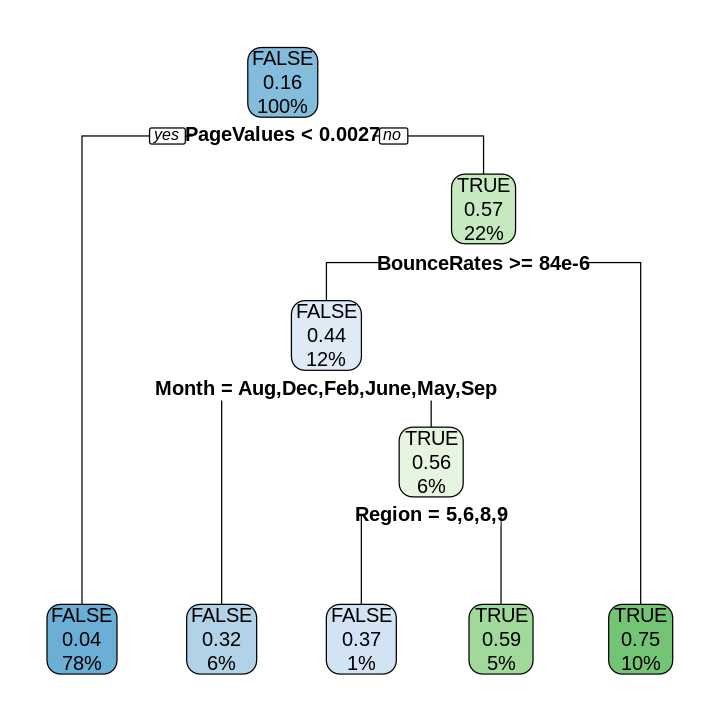

In [69]:
library(rpart)
library(rpart.plot)

# fitting and training the model using the decision tree classifier
fit <- rpart(Revenue ~ ., data = training, method = 'class')
rpart.plot(fit, extra = 106)

In [70]:
# making predictions
predict_unseen <- predict(fit, testing, type = 'class')

In [71]:
# comparing predicted values to actual results
table_mat <- table(testing$Revenue, predict_unseen)
table_mat

       predict_unseen
        FALSE TRUE
  FALSE  2898  189
  TRUE    193  379

The model correctly classified 2898 FALSE and 379 TRUE Revenue values. However, it also incorrectly classified 189 FALSE Revenue values as TRUE and 193 TRUE Revenue values as false.

In [72]:
# calculating the accuracy
accuracy_Test <- sum(diag(table_mat)) / sum(table_mat)
print(paste('Accuracy:', accuracy_Test))

[1] "Accuracy: 0.895599890680514"


The accuracy for this model is 89.6%.

# 4.2 Unsupervised Learning

Unsupervised learning requires data that has no labels. So we will create a new dataset that does not have the "Revenue" column.

In [73]:
df_new <- df[, -14]
df_new.class <- df[, "Revenue"]
head(df_new)

,Administrative,Informational,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
9742,0.00000000,0.0000000,0.05815603,0.00000000,0.05393050,0.0,Dec,2,5,3,1,Returning_Visitor,FALSE
10738,0.00000000,0.0000000,0.02553191,0.02941176,0.00000000,0.0,Dec,3,3,3,2,Returning_Visitor,FALSE
4280,0.07407407,0.2083333,0.02978723,0.05952381,0.05633414,0.0,May,1,1,1,2,Returning_Visitor,FALSE
6045,0.00000000,0.0000000,0.04255319,0.00000000,0.00000000,0.0,Jul,1,1,1,4,Returning_Visitor,FALSE
5512,0.22222222,0.0000000,0.05673759,0.00000000,0.02344305,0.0,Aug,1,1,1,4,New_Visitor,TRUE
5081,0.07407407,0.0000000,0.06382979,0.16734694,0.03644390,0.8,May,2,10,3,2,Returning_Visitor,FALSE


In [74]:
# previewing our target class
head(df_new.class)

[1] TRUE  FALSE FALSE FALSE FALSE FALSE
Levels: FALSE TRUE

In [75]:
# convert the factors into numerics
df_new$Month <- as.numeric(df_new$Month)
df_new$OperatingSystems <- as.numeric(df_new$OperatingSystems)
df_new$Browser <- as.numeric(df_new$Browser)
df_new$Region <- as.numeric(df_new$Region)
df_new$TrafficType <- as.numeric(df_new$TrafficType)
df_new$VisitorType <- as.numeric(df_new$VisitorType)
df_new$Weekend <- as.numeric(df_new$Weekend)
str(df_new)

'data.frame':	12199 obs. of  13 variables:
 $ Administrative  : num  0 0 0.0741 0 0.2222 ...
 $ Informational   : num  0 0 0.208 0 0 ...
 $ ProductRelated  : num  0.0582 0.0255 0.0298 0.0426 0.0567 ...
 $ BounceRates     : num  0 0.0294 0.0595 0 0 ...
 $ PageValues      : num  0.0539 0 0.0563 0 0.0234 ...
 $ SpecialDay      : num  0 0 0 0 0 0.8 0 0 0.4 0 ...
 $ Month           : num  2 2 7 4 1 7 8 7 3 6 ...
 $ OperatingSystems: num  2 3 1 1 1 2 1 2 1 2 ...
 $ Browser         : num  5 3 1 1 1 10 1 6 1 2 ...
 $ Region          : num  3 3 1 1 1 3 6 2 1 7 ...
 $ TrafficType     : num  1 2 2 4 4 2 2 5 3 9 ...
 $ VisitorType     : num  3 3 3 3 1 3 3 3 3 3 ...
 $ Weekend         : num  1 1 1 1 2 1 1 2 1 2 ...


In [76]:
# checking for missing values
anyNA(df_new)

[1] FALSE

We need to scale our data set before we can perform k-means clustering.

In [79]:
library(dplyr)

rescale_df <- scale(df_new)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [81]:
# previewing our rescaled dataset
head(rescale_df)

,Administrative,Informational,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
9742,-0.7025315,-0.3988128,0.20047915,-0.4503438,0.7266455,-0.3103105,-1.7550282,-0.1371074,1.5444234,-0.06380652,-0.76562243,0.409771,-0.5528638
10738,-0.7025315,-0.3988128,-0.31520538,-0.3207837,-0.3190356,-0.3103105,-1.7550282,0.9654459,0.3752276,-0.06380652,-0.51660683,0.409771,-0.5528638
4280,-0.1020844,3.5202438,-0.24794218,-0.1881388,0.7732507,-0.3103105,0.3503498,-1.2396607,-0.7939682,-0.89629390,-0.51660683,0.409771,-0.5528638
6045,-0.7025315,-0.3988128,-0.04615259,-0.4503438,-0.3190356,-0.3103105,-0.9128770,-1.2396607,-0.7939682,-0.89629390,-0.01857564,0.409771,-0.5528638
5512,1.0988098,-0.3988128,0.17805808,-0.4503438,0.1355115,-0.3103105,-2.1761037,-1.2396607,-0.7939682,-0.89629390,-0.01857564,-2.473873,1.8086156
5081,-0.1020844,-0.3988128,0.29016341,0.2868268,0.3875904,3.6954860,0.3503498,-0.1371074,4.4674128,-0.06380652,-0.51660683,0.409771,-0.5528638


### 4.2.1 K-Means Clustering

In [82]:
# applying k-means with k = 3
k_result <- kmeans(rescale_df, 3)

In [83]:
# previewing the number of records in each cluster
k_result$size

[1] 2696 8457 1046

In [84]:
# previewing the cluster centers
k_result$centers

Administrative,Informational,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0.05938601,7.333471e-02,0.023913246,-0.07984971,0.03418515,-0.3103105,0.04375804,0.004801337,-0.07124386,-0.004519582,-0.007122397,-0.097754580,1.8086156
0.02564465,-2.294446e-06,0.007138871,-0.01381898,0.01635059,-0.2833115,-0.04473531,-0.006474991,0.02047339,0.008495952,-0.020607336,-0.005539167,-0.5528638
-0.36040292,-1.889971e-01,-0.119353296,0.31753533,-0.22030607,3.0904040,0.24890521,0.039975716,0.01809753,-0.057041563,0.184969617,0.296740995,-0.1916432


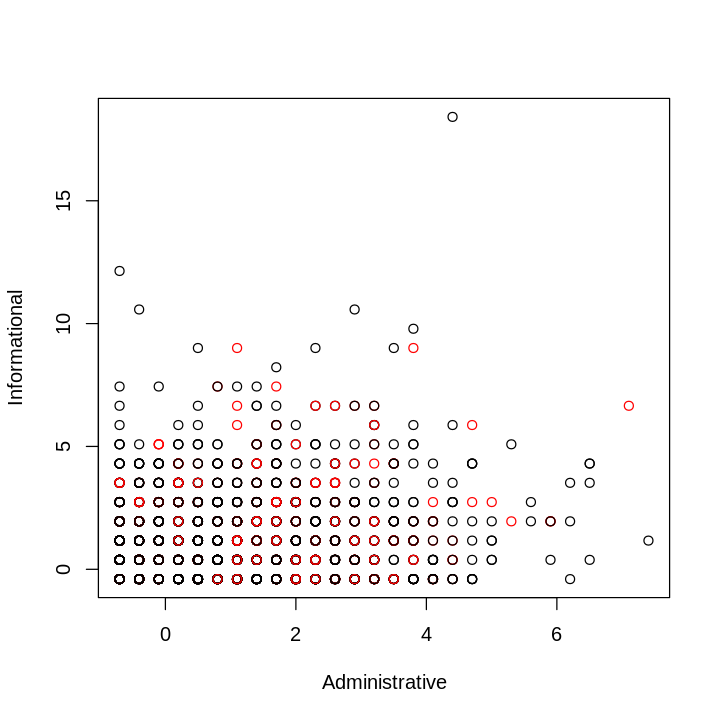

In [88]:
# visualizing the clusters
set_plot_dimensions(6, 6)

# plotting Administrative vs Informational
plot(rescale_df[,1:2], col = df_new.class) 

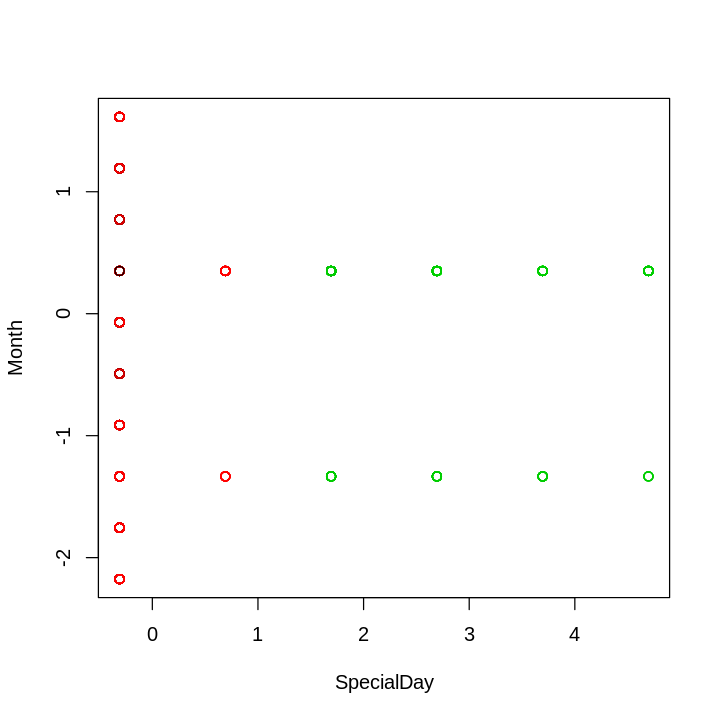

In [90]:
set_plot_dimensions(6, 6)

# plotting Special Day vs Month
plot(rescale_df[,6:7], col = k_result$cluster) 

In [91]:
# showing how the clusters respond to the classes
table(k_result$cluster, df_new.class)

   df_new.class
    FALSE TRUE
  1  2207  489
  2  7097 1360
  3   987   59

### 4.2.2 Hierarchical Clustering

As with K-means, we will use the rescaled dataset for hierarchical clustering.

In [92]:
# first we compute the euclidean distance
d <- dist(rescale_df, method = "euclidean")

In [93]:
# then we compute hierarchical clustering using the Ward method
hier <- hclust(d, method = "ward.D2" )

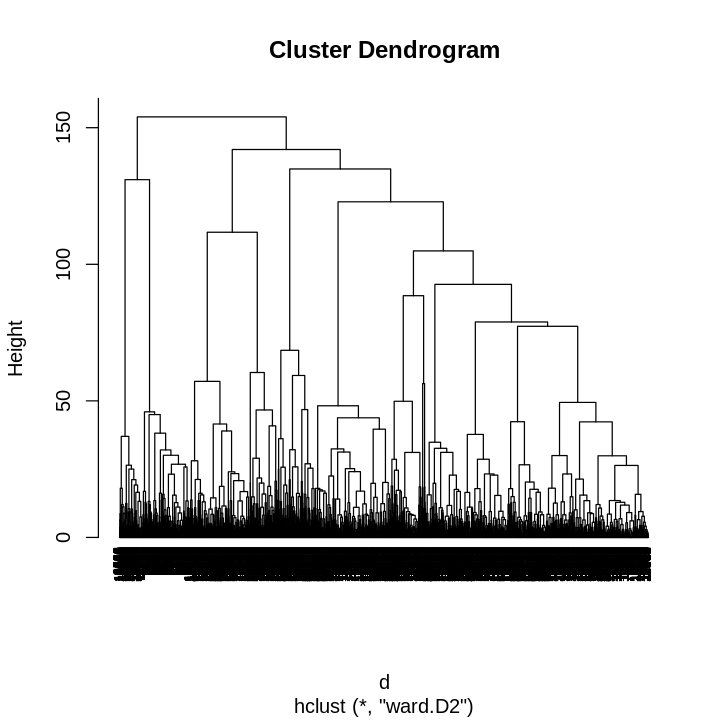

In [94]:
# finally, we plot the dendogram
plot(hier, cex = 0.6, hang = -1)

Okay, bye.